Requirements:


In [8]:
# If running on Colab for the first time
!pip install seaborn plotly --quiet
!pip install missingno --quiet

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as msno

Introducing dataset and dataset overview

In [ ]:
# Read CSV file
df = pd.read_csv("2026 QS World University Rankings.csv")
df.head()

,2026 Rank,Previous Rank,Institution Name,Country/Territory,Region,Size,Focus,Research,Status,AR SCORE,...,ISR RANK,ISD SCORE,ISD RANK,IRN SCORE,IRN RANK,EO SCORE,EO RANK,SUS SCORE,SUS RANK,Overall SCORE
0,1,1,Massachusetts Institute of Technology (MIT),United States of America,Americas,M,CO,VH,Private not for Profit,100.0,...,153,92.3,130,94.1,98,100.0,7,93.8,33,100
1,2,2,Imperial College London,United Kingdom,Europe,L,FO,VH,Public,99.6,...,35,100.0,22,97.5,28,95.9,68,98.3,7=,99.4
2,3,6,Stanford University,United States of America,Americas,L,FC,VH,Private not for Profit,100.0,...,261,76.1,230,96.5,49,100.0,2,95.4,19=,98.9
3,4,3,University of Oxford,United Kingdom,Europe,L,FC,VH,Public,100.0,...,80,98.7,67,100.0,1,100.0,3,77.9,198=,97.9
4,5,4,Harvard University,United States of America,Americas,L,FC,VH,Private not for Profit,100.0,...,217,60.6,335,99.4,8,100.0,1,77.8,201=,97.7


Statistical Summary

In [ ]:
# Basic statistics for numeric columns
df.describe(include=[np.number])

,AR SCORE,ER SCORE,FSR SCORE,CPF SCORE,IFR SCORE,ISR SCORE,ISD SCORE,IRN SCORE,EO SCORE,SUS SCORE
count,1501.000000,1501.000000,1501.000000,1501.000000,1414.000000,1464.00000,1464.000000,1499.000000,1501.000000,1477.000000
mean,25.785943,26.944237,33.950433,30.425516,36.305658,33.32541,34.526981,53.356905,29.989674,51.254367
std,24.500905,25.504494,28.440071,29.679882,35.252024,32.75066,31.108600,28.920632,29.197573,21.266331
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,3.000000
25%,8.800000,8.500000,10.800000,6.000000,6.600000,5.90000,8.675000,27.500000,6.200000,35.700000
50%,16.000000,16.500000,23.500000,18.000000,20.100000,19.40000,21.700000,55.800000,17.900000,48.700000
75%,32.700000,37.500000,50.500000,49.700000,66.100000,56.70000,55.650000,78.500000,46.000000,66.500000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000


Missing Data Percentage

In [5]:
missing_percent = df.isnull().mean() * 100
missing_percent[missing_percent > 0].sort_values(ascending=False)

,0
Previous Rank,7.461692
IFR RANK,5.796136
IFR SCORE,5.796136
Status,3.131246
ISR RANK,2.465023
ISR SCORE,2.465023
ISD SCORE,2.465023
ISD RANK,2.465023
SUS RANK,1.598934
SUS SCORE,1.598934


Missing data visualisation using heatmap


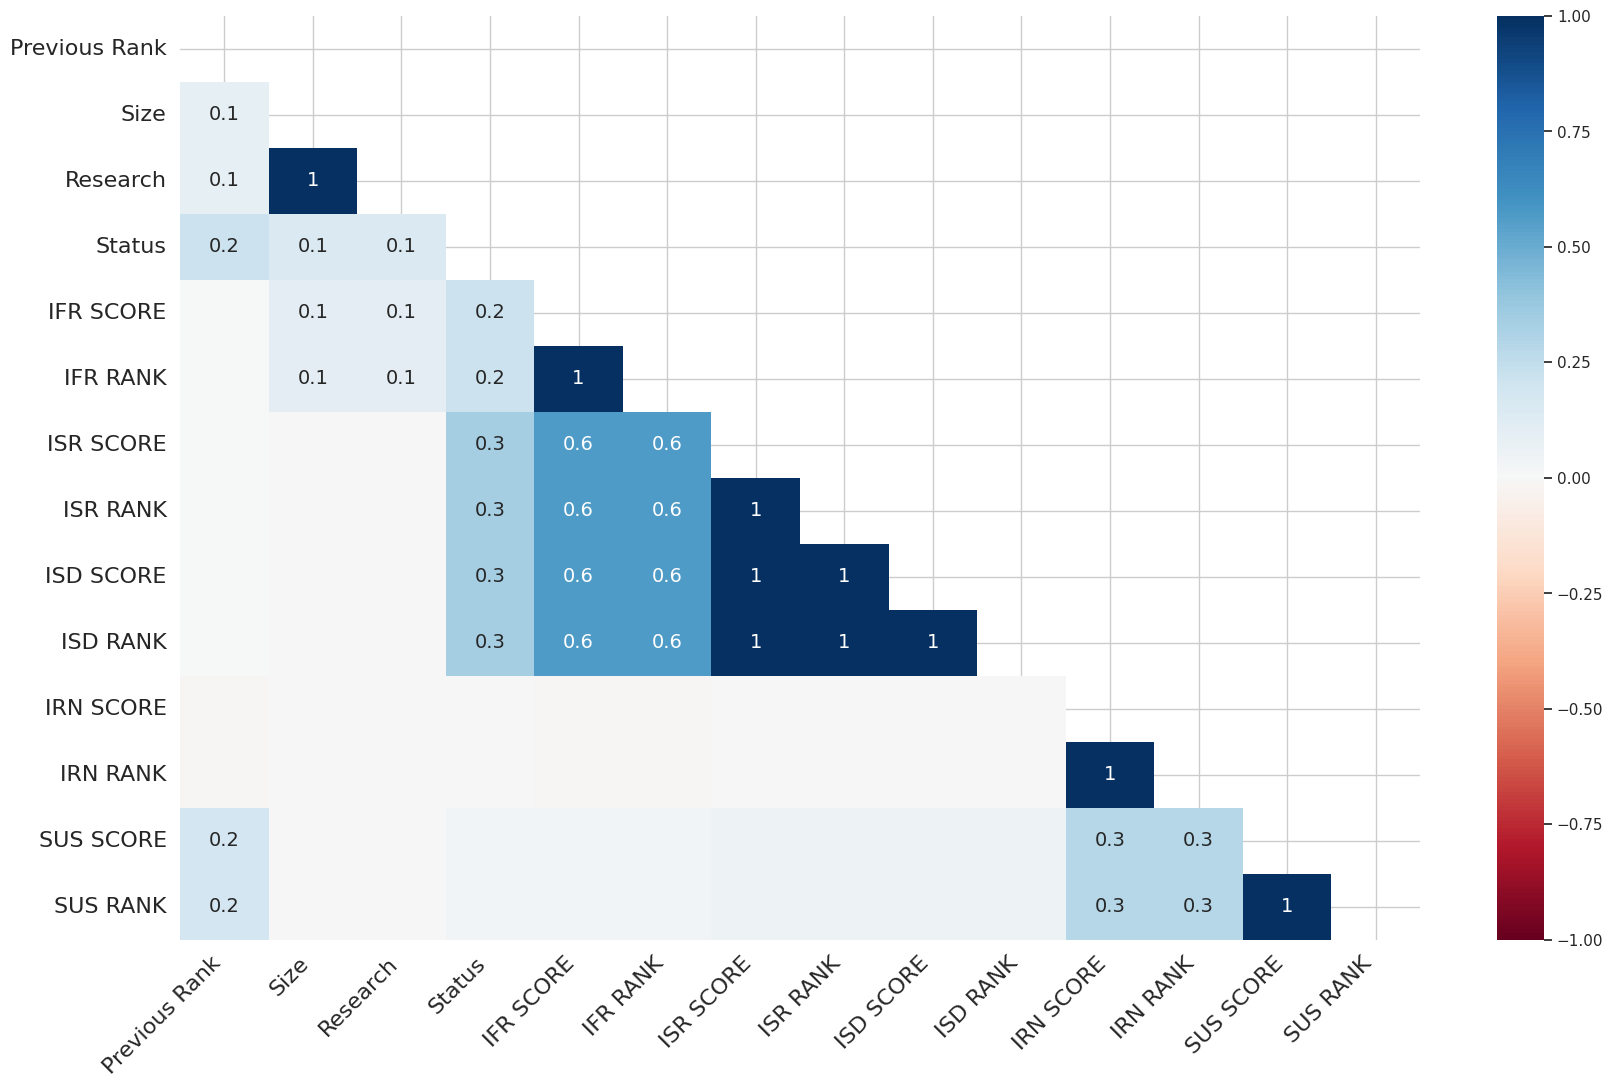

In [11]:
msno.heatmap(df)
plt.show()

Splitting by data types

In [13]:
# Separate numerical and categorical columns
num_cols = df.select_dtypes(include='number').columns
cat_cols = df.select_dtypes(include='object').columns

Handling missing values by filling with appropriate and effecient methods

In [16]:
#for numerical columns
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())
#for categorical columns
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

/tmp/ipython-input-16-1691773641.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


Checking for missing values post-filling

In [17]:
missing_percent = df.isnull().mean() * 100
missing_percent[missing_percent > 0].sort_values(ascending=False)
print("Total missing values after filling:", df.isnull().sum().sum())

Total missing values after filling: 0


Top 10 world institutions by overall score

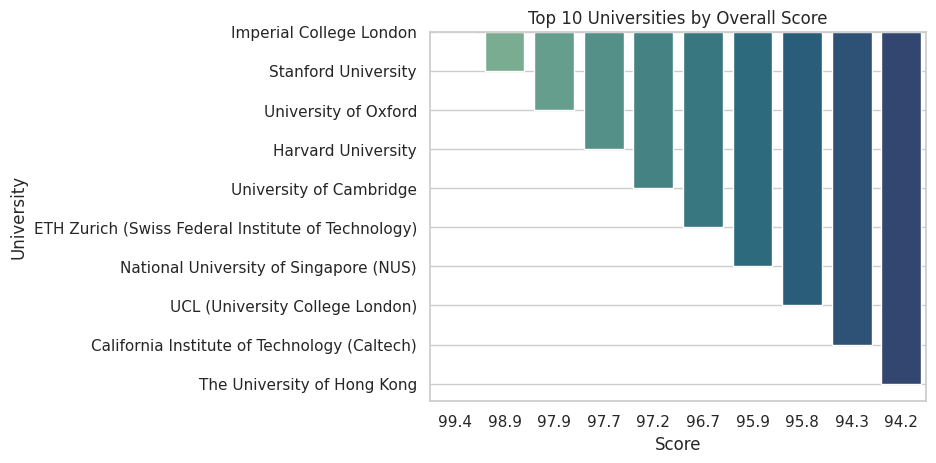

In [26]:
top10 = df.sort_values(by="Overall SCORE", ascending=False).head(10)
sns.barplot(data=top10, x="Overall SCORE", y="Institution Name", palette="crest")
plt.title("Top 10 Universities by Overall Score")
plt.xlabel("Score")
plt.ylabel("University")
plt.show()

INDIA VS WORLD

In [28]:
# Add a new column to distinguish India vs. Others
df['Region Group'] = df['Country/Territory'].apply(lambda x: 'India' if x.strip().lower() == 'india' else 'World')

In Research

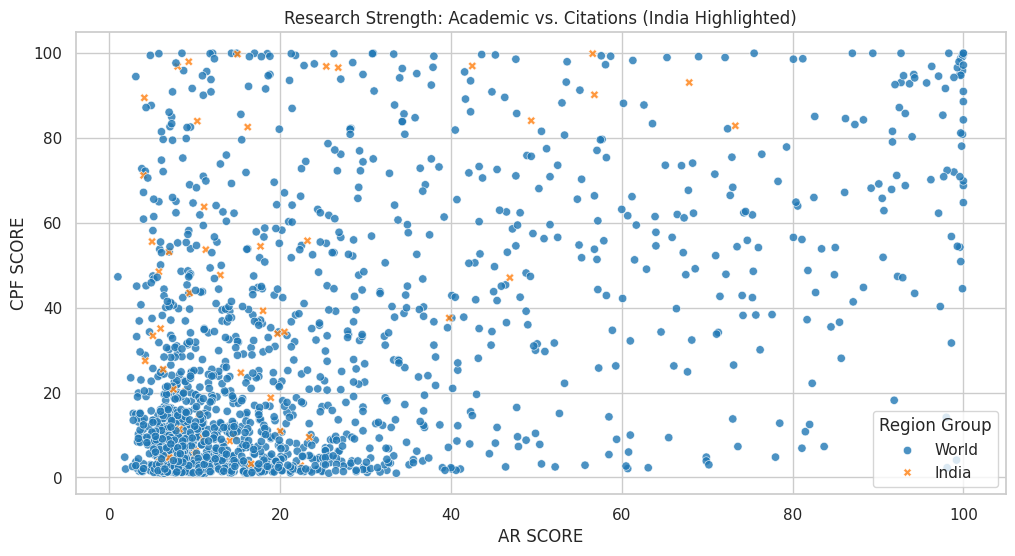

In [35]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='AR SCORE', y='CPF SCORE', hue='Region Group', style='Region Group', palette='tab10', alpha=0.8)
plt.title("Research Strength: Academic vs. Citations (India Highlighted)")
plt.grid(True)
plt.show()

In Academic And Employer Reputation


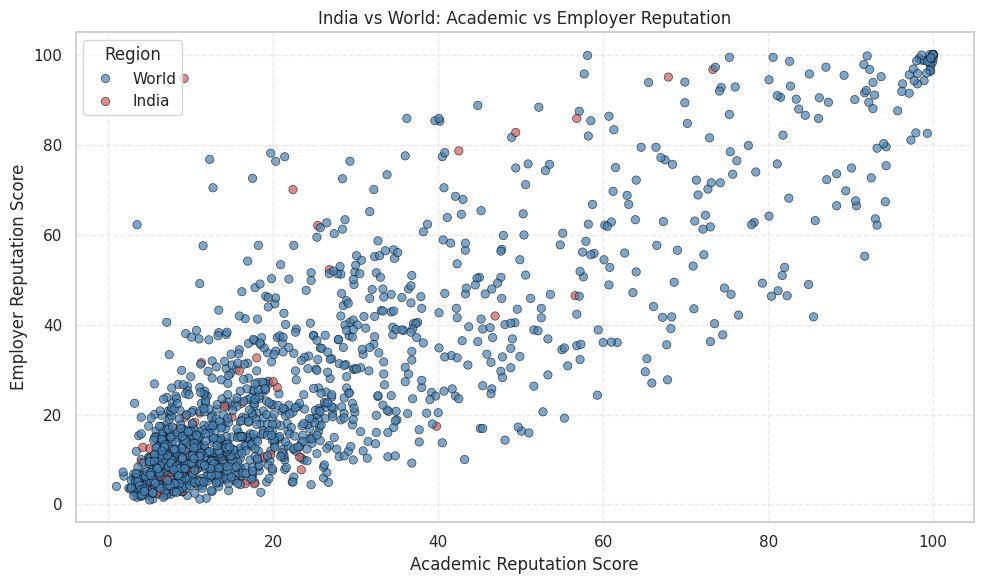

In [37]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x="AR SCORE",
    y="ER SCORE",
    hue="Region Group",
    palette={"India": "indianred", "World": "steelblue"},
    alpha=0.7,
    edgecolor='black'
)

plt.title("India vs World: Academic vs Employer Reputation")
plt.xlabel("Academic Reputation Score")
plt.ylabel("Employer Reputation Score")
plt.grid(True, linestyle='--', alpha=0.4)
plt.legend(title="Region")
plt.tight_layout()
plt.show()
